### Importing the libraries

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
sns.set_style('darkgrid')

### Importing the dataset

In [75]:
df = pd.read_csv('Churn_Modelling.csv')
df = df.iloc[:, 3:]

### Defining the dependent and independent variables

In [76]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Encoding the categorical data

In [77]:
def sum_prev (l_in):
    l_out = []
    l_out.append(l_in[0])
    for i in range(len(l_in)-1):
        l_out.append(l_out[i] + l_in[i+1])
    return [e - 1 for e in l_out]

# df and X must have the same data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
columns_to_encode = [1, 2] # Change here
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), columns_to_encode)], remainder='passthrough')
columns_to_encode = [df.iloc[:, del_idx].nunique() for del_idx in columns_to_encode]
columns_to_encode = sum_prev(columns_to_encode)
X = np.array(ct.fit_transform(X))
X = np.delete(X, columns_to_encode, 1)

### Splitting the dataset

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Feature scaling the dataset

In [79]:
from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

### Building the DFF_NN (Using Dropout and EarlyStopping)

The larger the batch size, the faster you train the model.

The larger the batch size, the more likely you are to overfit the model.

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=25, mode='min')

# Creating the model
model = Sequential()

# Input/hidder layer
model.add(Dense(units=X_train.shape[1], activation='relu'))
model.add(Dropout(rate=0.2))

# Hidder layer
model.add(Dense(units=X_train.shape[1] // 2, activation='relu'))
model.add(Dropout(rate=0.5))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compiling
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the model
model.fit(X_train, y_train, batch_size=128, epochs=1000, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 8000 samples, validate on 2000 samples
Epoch 1/1000
8000/8000 [==============================] - 2s 200us/sample - loss: 0.7303 - acc: 0.6064 - val_loss: 0.5947 - val_acc: 0.7570
Epoch 2/1000
8000/8000 [==============================] - 0s 35us/sample - loss: 0.6060 - acc: 0.7089 - val_loss: 0.5157 - val_acc: 0.7975
Epoch 3/1000
8000/8000 [==============================] - 0s 41us/sample - loss: 0.5540 - acc: 0.7533 - val_loss: 0.4787 - val_acc: 0.7975
Epoch 4/1000
8000/8000 [==============================] - 0s 35us/sample - loss: 0.5296 - acc: 0.7765 - val_loss: 0.4643 - val_acc: 0.7975
Epoch 5/1000
8000/8000 [==============================] - 0s 41us/sample - loss: 0.5183 - acc: 0.7806 - val_loss: 0.4560 - val_acc: 0.7975
Epoch 6/1000
8000/8000 [==============================] - 0s 35us/sample - loss: 0.5063 - acc: 0.7871 - val_loss: 0.4512 - val_acc: 0.7975
Epoch 7/1000
8000/8000 [==============================] - 0s 40us/sample - loss: 0.5026 - acc: 0.7924 - val_loss: 0.4

Epoch 59/1000
8000/8000 [==============================] - 0s 35us/sample - loss: 0.4196 - acc: 0.8202 - val_loss: 0.3684 - val_acc: 0.8500
Epoch 60/1000
8000/8000 [==============================] - 0s 37us/sample - loss: 0.4184 - acc: 0.8215 - val_loss: 0.3690 - val_acc: 0.8515
Epoch 61/1000
8000/8000 [==============================] - 0s 40us/sample - loss: 0.4108 - acc: 0.8265 - val_loss: 0.3685 - val_acc: 0.8500
Epoch 62/1000
8000/8000 [==============================] - 0s 40us/sample - loss: 0.4128 - acc: 0.8260 - val_loss: 0.3674 - val_acc: 0.8530
Epoch 63/1000
8000/8000 [==============================] - 0s 38us/sample - loss: 0.4197 - acc: 0.8230 - val_loss: 0.3682 - val_acc: 0.8515
Epoch 64/1000
8000/8000 [==============================] - 0s 39us/sample - loss: 0.4168 - acc: 0.8217 - val_loss: 0.3675 - val_acc: 0.8490
Epoch 65/1000
8000/8000 [==============================] - 0s 39us/sample - loss: 0.4144 - acc: 0.8229 - val_loss: 0.3678 - val_acc: 0.8505
Epoch 66/1000
8000/8

8000/8000 [==============================] - 1s 80us/sample - loss: 0.4009 - acc: 0.8278 - val_loss: 0.3552 - val_acc: 0.8590
Epoch 118/1000
8000/8000 [==============================] - 0s 61us/sample - loss: 0.4042 - acc: 0.8269 - val_loss: 0.3537 - val_acc: 0.8620 0s - loss: 0.3953 - acc: 
Epoch 119/1000
8000/8000 [==============================] - 0s 51us/sample - loss: 0.4086 - acc: 0.8255 - val_loss: 0.3547 - val_acc: 0.8595
Epoch 120/1000
8000/8000 [==============================] - 0s 44us/sample - loss: 0.4097 - acc: 0.8260 - val_loss: 0.3546 - val_acc: 0.8585
Epoch 121/1000
8000/8000 [==============================] - 0s 33us/sample - loss: 0.4041 - acc: 0.8289 - val_loss: 0.3541 - val_acc: 0.8615
Epoch 122/1000
8000/8000 [==============================] - 0s 33us/sample - loss: 0.4036 - acc: 0.8253 - val_loss: 0.3538 - val_acc: 0.8600
Epoch 123/1000
8000/8000 [==============================] - 0s 33us/sample - loss: 0.4097 - acc: 0.8286 - val_loss: 0.3549 - val_acc: 0.8605
Ep

### Visualising (Using Dropout and EarlyStopping)

In [81]:
losses = pd.DataFrame(model.history.history)
losses[-50:]

,loss,acc,val_loss,val_acc
117,0.404216,0.826875,0.353690,0.8620
118,0.408585,0.825500,0.354742,0.8595
119,0.409691,0.826000,0.354555,0.8585
120,0.404097,0.828875,0.354056,0.8615
121,0.403635,0.825250,0.353839,0.8600
122,0.409702,0.828625,0.354862,0.8605
123,0.404167,0.825750,0.354722,0.8575
124,0.411732,0.827500,0.354323,0.8630
125,0.405523,0.828500,0.354709,0.8580
126,0.413201,0.822875,0.355934,0.8560


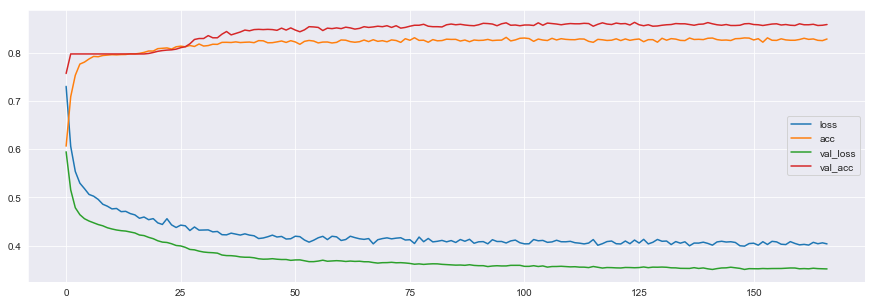

In [82]:
losses.plot(figsize=(15, 5))

### Building the DFF_NN (Using only EarlyStopping)

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=25, mode='min')

# Creating the model
model_2 = Sequential()

# Input/hidder layer
model_2.add(Dense(units=X_train.shape[1], activation='relu'))
# model_2.add(Dropout(rate=0.2))

# Hidder layer
model_2.add(Dense(units=X_train.shape[1] // 2, activation='relu'))
# model_2.add(Dropout(rate=0.5))

# Output layer
model_2.add(Dense(units=1, activation='sigmoid'))

# Compiling
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the model
model_2.fit(X_train, y_train, batch_size=128, epochs=1000, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 8000 samples, validate on 2000 samples
Epoch 1/1000
8000/8000 [==============================] - 1s 184us/sample - loss: 0.6926 - acc: 0.5295 - val_loss: 0.5982 - val_acc: 0.7085
Epoch 2/1000
8000/8000 [==============================] - 0s 28us/sample - loss: 0.5533 - acc: 0.7574 - val_loss: 0.5160 - val_acc: 0.7880
Epoch 3/1000
8000/8000 [==============================] - 0s 32us/sample - loss: 0.4958 - acc: 0.7934 - val_loss: 0.4805 - val_acc: 0.7970
Epoch 4/1000
8000/8000 [==============================] - 0s 32us/sample - loss: 0.4717 - acc: 0.7972 - val_loss: 0.4620 - val_acc: 0.7985
Epoch 5/1000
8000/8000 [==============================] - 0s 35us/sample - loss: 0.4582 - acc: 0.7972 - val_loss: 0.4490 - val_acc: 0.7980
Epoch 6/1000
8000/8000 [==============================] - 0s 37us/sample - loss: 0.4488 - acc: 0.7979 - val_loss: 0.4392 - val_acc: 0.7995
Epoch 7/1000
8000/8000 [==============================] - 0s 42us/sample - loss: 0.4412 - acc: 0.8011 - val_loss: 0.4

8000/8000 [==============================] - 1s 64us/sample - loss: 0.3390 - acc: 0.8601 - val_loss: 0.3341 - val_acc: 0.8670
Epoch 59/1000
8000/8000 [==============================] - 0s 54us/sample - loss: 0.3384 - acc: 0.8595 - val_loss: 0.3343 - val_acc: 0.8665
Epoch 60/1000
8000/8000 [==============================] - 0s 44us/sample - loss: 0.3387 - acc: 0.8618 - val_loss: 0.3358 - val_acc: 0.8660
Epoch 61/1000
8000/8000 [==============================] - 0s 44us/sample - loss: 0.3381 - acc: 0.8600 - val_loss: 0.3341 - val_acc: 0.8645
Epoch 62/1000
8000/8000 [==============================] - 0s 51us/sample - loss: 0.3377 - acc: 0.8605 - val_loss: 0.3341 - val_acc: 0.8665
Epoch 63/1000
8000/8000 [==============================] - 1s 66us/sample - loss: 0.3379 - acc: 0.8608 - val_loss: 0.3339 - val_acc: 0.8650
Epoch 64/1000
8000/8000 [==============================] - 0s 43us/sample - loss: 0.3375 - acc: 0.8601 - val_loss: 0.3331 - val_acc: 0.8650
Epoch 65/1000
8000/8000 [=========

8000/8000 [==============================] - 0s 42us/sample - loss: 0.3309 - acc: 0.8666 - val_loss: 0.3320 - val_acc: 0.8600
Epoch 117/1000
8000/8000 [==============================] - 0s 37us/sample - loss: 0.3306 - acc: 0.8634 - val_loss: 0.3315 - val_acc: 0.8595
Epoch 118/1000
8000/8000 [==============================] - 0s 38us/sample - loss: 0.3304 - acc: 0.8643 - val_loss: 0.3298 - val_acc: 0.8640
Epoch 119/1000
8000/8000 [==============================] - 0s 38us/sample - loss: 0.3301 - acc: 0.8664 - val_loss: 0.3301 - val_acc: 0.8640
Epoch 120/1000
8000/8000 [==============================] - 0s 39us/sample - loss: 0.3301 - acc: 0.8666 - val_loss: 0.3319 - val_acc: 0.8615
Epoch 121/1000
8000/8000 [==============================] - 0s 41us/sample - loss: 0.3300 - acc: 0.8655 - val_loss: 0.3294 - val_acc: 0.8645
Epoch 122/1000
8000/8000 [==============================] - 0s 38us/sample - loss: 0.3299 - acc: 0.8656 - val_loss: 0.3305 - val_acc: 0.8610
Epoch 123/1000
8000/8000 [==

8000/8000 [==============================] - 0s 40us/sample - loss: 0.3271 - acc: 0.8676 - val_loss: 0.3286 - val_acc: 0.8625
Epoch 174/1000
8000/8000 [==============================] - 0s 36us/sample - loss: 0.3268 - acc: 0.8676 - val_loss: 0.3274 - val_acc: 0.8650
Epoch 175/1000
8000/8000 [==============================] - 0s 41us/sample - loss: 0.3267 - acc: 0.8664 - val_loss: 0.3289 - val_acc: 0.8615
Epoch 176/1000
8000/8000 [==============================] - 0s 41us/sample - loss: 0.3272 - acc: 0.8656 - val_loss: 0.3279 - val_acc: 0.8620
Epoch 177/1000
8000/8000 [==============================] - 0s 38us/sample - loss: 0.3267 - acc: 0.8668 - val_loss: 0.3274 - val_acc: 0.8655
Epoch 178/1000
8000/8000 [==============================] - 0s 40us/sample - loss: 0.3267 - acc: 0.8652 - val_loss: 0.3282 - val_acc: 0.8650
Epoch 179/1000
8000/8000 [==============================] - 0s 42us/sample - loss: 0.3265 - acc: 0.8673 - val_loss: 0.3279 - val_acc: 0.8630
Epoch 180/1000
8000/8000 [==

### Visualising (Using only EarlyStopping)

In [84]:
losses_2 = pd.DataFrame(model_2.history.history)
losses_2[-50:]

,loss,acc,val_loss,val_acc
168,0.327362,0.866250,0.328148,0.8630
169,0.327281,0.866500,0.329148,0.8610
170,0.327054,0.866250,0.328882,0.8620
171,0.327210,0.866250,0.328246,0.8640
172,0.327083,0.867625,0.328643,0.8625
173,0.326779,0.867625,0.327409,0.8650
174,0.326722,0.866375,0.328904,0.8615
175,0.327230,0.865625,0.327928,0.8620
176,0.326735,0.866750,0.327378,0.8655
177,0.326675,0.865250,0.328151,0.8650


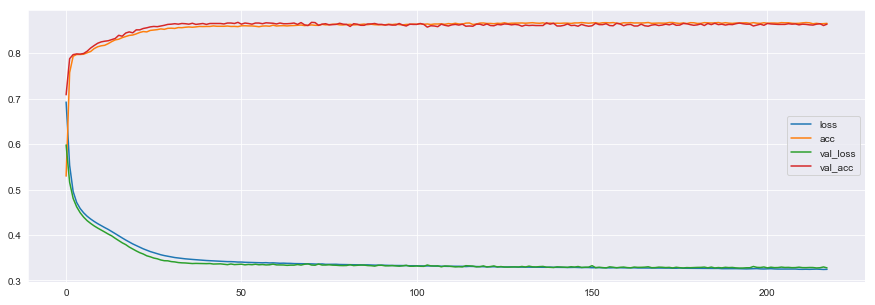

In [85]:
losses_2.plot(figsize=(15, 5))

### Building the DFF_NN (Using only Dropout)

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=25, mode='min')

# Creating the model
model_3 = Sequential()

# Input/hidder layer
model_3.add(Dense(units=X_train.shape[1], activation='relu'))
model_3.add(Dropout(rate=0.2))

# Hidder layer
model_3.add(Dense(units=X_train.shape[1] // 2, activation='relu'))
model_3.add(Dropout(rate=0.5))

# Output layer
model_3.add(Dense(units=1, activation='sigmoid'))

# Compiling
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the model
model_3.fit(X_train, y_train, batch_size=128, epochs=1000, validation_data=(X_test, y_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/1000
8000/8000 [==============================] - 7s 873us/sample - loss: 0.6974 - acc: 0.6676 - val_loss: 0.5773 - val_acc: 0.7390
Epoch 2/1000
8000/8000 [==============================] - 1s 131us/sample - loss: 0.6144 - acc: 0.7461 - val_loss: 0.5372 - val_acc: 0.7845
Epoch 3/1000
8000/8000 [==============================] - 1s 105us/sample - loss: 0.5803 - acc: 0.7764 - val_loss: 0.5130 - val_acc: 0.7995
Epoch 4/1000
8000/8000 [==============================] - 1s 108us/sample - loss: 0.5503 - acc: 0.7856 - val_loss: 0.4943 - val_acc: 0.7980
Epoch 5/1000
8000/8000 [==============================] - 1s 129us/sample - loss: 0.5441 - acc: 0.7950 - val_loss: 0.4816 - val_acc: 0.7990
Epoch 6/1000
8000/8000 [==============================] - 1s 102us/sample - loss: 0.5272 - acc: 0.7926 - val_loss: 0.4734 - val_acc: 0.7985
Epoch 7/1000
8000/8000 [==============================] - 1s 117us/sample - loss: 0.5131 - acc: 0.7965 - val_los

8000/8000 [==============================] - 0s 49us/sample - loss: 0.4211 - acc: 0.8269 - val_loss: 0.3771 - val_acc: 0.8265
Epoch 60/1000
8000/8000 [==============================] - 1s 77us/sample - loss: 0.4208 - acc: 0.8289 - val_loss: 0.3760 - val_acc: 0.8270
Epoch 61/1000
8000/8000 [==============================] - 0s 50us/sample - loss: 0.4207 - acc: 0.8270 - val_loss: 0.3754 - val_acc: 0.8285
Epoch 62/1000
8000/8000 [==============================] - 0s 42us/sample - loss: 0.4218 - acc: 0.8289 - val_loss: 0.3758 - val_acc: 0.8290
Epoch 63/1000
8000/8000 [==============================] - 0s 45us/sample - loss: 0.4185 - acc: 0.8309 - val_loss: 0.3759 - val_acc: 0.8285
Epoch 64/1000
8000/8000 [==============================] - 0s 41us/sample - loss: 0.4220 - acc: 0.8282 - val_loss: 0.3758 - val_acc: 0.8285
Epoch 65/1000
8000/8000 [==============================] - 0s 40us/sample - loss: 0.4194 - acc: 0.8270 - val_loss: 0.3753 - val_acc: 0.8270
Epoch 66/1000
8000/8000 [=========

8000/8000 [==============================] - 0s 45us/sample - loss: 0.3996 - acc: 0.8390 - val_loss: 0.3512 - val_acc: 0.8600
Epoch 118/1000
8000/8000 [==============================] - 0s 46us/sample - loss: 0.3960 - acc: 0.8357 - val_loss: 0.3514 - val_acc: 0.8580
Epoch 119/1000
8000/8000 [==============================] - 0s 45us/sample - loss: 0.4004 - acc: 0.8331 - val_loss: 0.3520 - val_acc: 0.8570
Epoch 120/1000
8000/8000 [==============================] - 0s 46us/sample - loss: 0.3953 - acc: 0.8384 - val_loss: 0.3512 - val_acc: 0.8565
Epoch 121/1000
8000/8000 [==============================] - 0s 48us/sample - loss: 0.3996 - acc: 0.8328 - val_loss: 0.3519 - val_acc: 0.8530
Epoch 122/1000
8000/8000 [==============================] - 0s 45us/sample - loss: 0.4043 - acc: 0.8320 - val_loss: 0.3524 - val_acc: 0.8560
Epoch 123/1000
8000/8000 [==============================] - 0s 45us/sample - loss: 0.3971 - acc: 0.8353 - val_loss: 0.3509 - val_acc: 0.8590
Epoch 124/1000
8000/8000 [==

Epoch 175/1000
8000/8000 [==============================] - 0s 44us/sample - loss: 0.3861 - acc: 0.8380 - val_loss: 0.3417 - val_acc: 0.8605
Epoch 176/1000
8000/8000 [==============================] - 0s 38us/sample - loss: 0.3963 - acc: 0.8388 - val_loss: 0.3434 - val_acc: 0.8615
Epoch 177/1000
8000/8000 [==============================] - 0s 47us/sample - loss: 0.3908 - acc: 0.8386 - val_loss: 0.3429 - val_acc: 0.8635
Epoch 178/1000
8000/8000 [==============================] - 0s 45us/sample - loss: 0.3949 - acc: 0.8376 - val_loss: 0.3428 - val_acc: 0.8605
Epoch 179/1000
8000/8000 [==============================] - 0s 45us/sample - loss: 0.3923 - acc: 0.8385 - val_loss: 0.3423 - val_acc: 0.8615
Epoch 180/1000
8000/8000 [==============================] - 0s 44us/sample - loss: 0.3947 - acc: 0.8357 - val_loss: 0.3437 - val_acc: 0.8640
Epoch 181/1000
8000/8000 [==============================] - 0s 44us/sample - loss: 0.3850 - acc: 0.8409 - val_loss: 0.3422 - val_acc: 0.8620
Epoch 182/100

8000/8000 [==============================] - 0s 61us/sample - loss: 0.3870 - acc: 0.8403 - val_loss: 0.3383 - val_acc: 0.8610
Epoch 234/1000
8000/8000 [==============================] - 1s 78us/sample - loss: 0.3930 - acc: 0.8382 - val_loss: 0.3404 - val_acc: 0.8625
Epoch 235/1000
8000/8000 [==============================] - 1s 82us/sample - loss: 0.3947 - acc: 0.8356 - val_loss: 0.3423 - val_acc: 0.8605
Epoch 236/1000
8000/8000 [==============================] - 0s 55us/sample - loss: 0.3919 - acc: 0.8375 - val_loss: 0.3416 - val_acc: 0.8625
Epoch 237/1000
8000/8000 [==============================] - 1s 76us/sample - loss: 0.3927 - acc: 0.8375 - val_loss: 0.3416 - val_acc: 0.8625
Epoch 238/1000
8000/8000 [==============================] - 1s 70us/sample - loss: 0.3883 - acc: 0.8409 - val_loss: 0.3410 - val_acc: 0.8650
Epoch 239/1000
8000/8000 [==============================] - ETA: 0s - loss: 0.3928 - acc: 0.839 - 0s 58us/sample - loss: 0.3965 - acc: 0.8372 - val_loss: 0.3419 - val_ac

Epoch 291/1000
8000/8000 [==============================] - 0s 41us/sample - loss: 0.3961 - acc: 0.8351 - val_loss: 0.3409 - val_acc: 0.8600
Epoch 292/1000
8000/8000 [==============================] - 0s 38us/sample - loss: 0.3849 - acc: 0.8365 - val_loss: 0.3406 - val_acc: 0.8615
Epoch 293/1000
8000/8000 [==============================] - 0s 39us/sample - loss: 0.3925 - acc: 0.8354 - val_loss: 0.3410 - val_acc: 0.8600
Epoch 294/1000
8000/8000 [==============================] - 0s 45us/sample - loss: 0.3886 - acc: 0.8388 - val_loss: 0.3403 - val_acc: 0.8610
Epoch 295/1000
8000/8000 [==============================] - 0s 41us/sample - loss: 0.3900 - acc: 0.8399 - val_loss: 0.3393 - val_acc: 0.8605
Epoch 296/1000
8000/8000 [==============================] - 0s 40us/sample - loss: 0.3909 - acc: 0.8413 - val_loss: 0.3397 - val_acc: 0.8620
Epoch 297/1000
8000/8000 [==============================] - 0s 49us/sample - loss: 0.3886 - acc: 0.8404 - val_loss: 0.3403 - val_acc: 0.8615
Epoch 298/100

8000/8000 [==============================] - 0s 53us/sample - loss: 0.3794 - acc: 0.8426 - val_loss: 0.3378 - val_acc: 0.8595
Epoch 350/1000
8000/8000 [==============================] - 1s 64us/sample - loss: 0.3921 - acc: 0.8422 - val_loss: 0.3388 - val_acc: 0.8620
Epoch 351/1000
8000/8000 [==============================] - 0s 58us/sample - loss: 0.3823 - acc: 0.8432 - val_loss: 0.3374 - val_acc: 0.8600
Epoch 352/1000
8000/8000 [==============================] - 0s 51us/sample - loss: 0.3881 - acc: 0.8395 - val_loss: 0.3383 - val_acc: 0.8605
Epoch 353/1000
8000/8000 [==============================] - 1s 77us/sample - loss: 0.3777 - acc: 0.8459 - val_loss: 0.3370 - val_acc: 0.8625
Epoch 354/1000
8000/8000 [==============================] - 1s 64us/sample - loss: 0.3888 - acc: 0.8421 - val_loss: 0.3375 - val_acc: 0.8630
Epoch 355/1000
8000/8000 [==============================] - 0s 50us/sample - loss: 0.3912 - acc: 0.8386 - val_loss: 0.3384 - val_acc: 0.8635
Epoch 356/1000
8000/8000 [==

Epoch 407/1000
8000/8000 [==============================] - 0s 43us/sample - loss: 0.3912 - acc: 0.8385 - val_loss: 0.3389 - val_acc: 0.8635
Epoch 408/1000
8000/8000 [==============================] - 0s 42us/sample - loss: 0.3891 - acc: 0.8413 - val_loss: 0.3406 - val_acc: 0.8610
Epoch 409/1000
8000/8000 [==============================] - 0s 43us/sample - loss: 0.3891 - acc: 0.8414 - val_loss: 0.3398 - val_acc: 0.8605
Epoch 410/1000
8000/8000 [==============================] - 0s 43us/sample - loss: 0.3882 - acc: 0.8419 - val_loss: 0.3384 - val_acc: 0.8600
Epoch 411/1000
8000/8000 [==============================] - 0s 42us/sample - loss: 0.3932 - acc: 0.8374 - val_loss: 0.3406 - val_acc: 0.8585
Epoch 412/1000
8000/8000 [==============================] - 0s 45us/sample - loss: 0.3946 - acc: 0.8338 - val_loss: 0.3413 - val_acc: 0.8605
Epoch 413/1000
8000/8000 [==============================] - 0s 44us/sample - loss: 0.3856 - acc: 0.8395 - val_loss: 0.3385 - val_acc: 0.8610
Epoch 414/100

8000/8000 [==============================] - 0s 41us/sample - loss: 0.3883 - acc: 0.8404 - val_loss: 0.3386 - val_acc: 0.8620
Epoch 466/1000
8000/8000 [==============================] - 0s 46us/sample - loss: 0.3869 - acc: 0.8439 - val_loss: 0.3371 - val_acc: 0.8625
Epoch 467/1000
8000/8000 [==============================] - ETA: 0s - loss: 0.3940 - acc: 0.835 - 0s 50us/sample - loss: 0.3919 - acc: 0.8372 - val_loss: 0.3389 - val_acc: 0.8625
Epoch 468/1000
8000/8000 [==============================] - 0s 46us/sample - loss: 0.3924 - acc: 0.8414 - val_loss: 0.3385 - val_acc: 0.8635
Epoch 469/1000
8000/8000 [==============================] - 0s 46us/sample - loss: 0.3780 - acc: 0.8426 - val_loss: 0.3379 - val_acc: 0.8625
Epoch 470/1000
8000/8000 [==============================] - 0s 50us/sample - loss: 0.3884 - acc: 0.8413 - val_loss: 0.3385 - val_acc: 0.8615
Epoch 471/1000
8000/8000 [==============================] - 0s 46us/sample - loss: 0.3851 - acc: 0.8445 - val_loss: 0.3384 - val_ac

Epoch 523/1000
8000/8000 [==============================] - 0s 53us/sample - loss: 0.3877 - acc: 0.8416 - val_loss: 0.3372 - val_acc: 0.8660
Epoch 524/1000
8000/8000 [==============================] - 0s 51us/sample - loss: 0.3888 - acc: 0.8447 - val_loss: 0.3400 - val_acc: 0.8650
Epoch 525/1000
8000/8000 [==============================] - 0s 42us/sample - loss: 0.3819 - acc: 0.8430 - val_loss: 0.3386 - val_acc: 0.8665
Epoch 526/1000
8000/8000 [==============================] - 1s 69us/sample - loss: 0.3859 - acc: 0.8422 - val_loss: 0.3388 - val_acc: 0.8625
Epoch 527/1000
8000/8000 [==============================] - 0s 60us/sample - loss: 0.3890 - acc: 0.8404 - val_loss: 0.3383 - val_acc: 0.8615
Epoch 528/1000
8000/8000 [==============================] - 0s 46us/sample - loss: 0.3880 - acc: 0.8401 - val_loss: 0.3387 - val_acc: 0.8630
Epoch 529/1000
8000/8000 [==============================] - 0s 47us/sample - loss: 0.3819 - acc: 0.8425 - val_loss: 0.3381 - val_acc: 0.8640
Epoch 530/100

8000/8000 [==============================] - 1s 66us/sample - loss: 0.3883 - acc: 0.8413 - val_loss: 0.3372 - val_acc: 0.8605
Epoch 582/1000
8000/8000 [==============================] - 1s 65us/sample - loss: 0.3862 - acc: 0.8430 - val_loss: 0.3366 - val_acc: 0.8605
Epoch 583/1000
8000/8000 [==============================] - 1s 63us/sample - loss: 0.3891 - acc: 0.8389 - val_loss: 0.3379 - val_acc: 0.8605
Epoch 584/1000
8000/8000 [==============================] - 1s 64us/sample - loss: 0.3856 - acc: 0.8414 - val_loss: 0.3369 - val_acc: 0.8620
Epoch 585/1000
8000/8000 [==============================] - 1s 65us/sample - loss: 0.3838 - acc: 0.8438 - val_loss: 0.3360 - val_acc: 0.8630
Epoch 586/1000
8000/8000 [==============================] - 1s 64us/sample - loss: 0.3874 - acc: 0.8430 - val_loss: 0.3366 - val_acc: 0.8630
Epoch 587/1000
8000/8000 [==============================] - 1s 64us/sample - loss: 0.3901 - acc: 0.8385 - val_loss: 0.3386 - val_acc: 0.8635
Epoch 588/1000
8000/8000 [==

8000/8000 [==============================] - 0s 62us/sample - loss: 0.3873 - acc: 0.8410 - val_loss: 0.3352 - val_acc: 0.8675
Epoch 640/1000
8000/8000 [==============================] - 1s 68us/sample - loss: 0.3936 - acc: 0.8374 - val_loss: 0.3373 - val_acc: 0.8685
Epoch 641/1000
8000/8000 [==============================] - 1s 67us/sample - loss: 0.3852 - acc: 0.8403 - val_loss: 0.3373 - val_acc: 0.8680
Epoch 642/1000
8000/8000 [==============================] - 1s 64us/sample - loss: 0.3849 - acc: 0.8409 - val_loss: 0.3368 - val_acc: 0.8660
Epoch 643/1000
8000/8000 [==============================] - 1s 67us/sample - loss: 0.3873 - acc: 0.8419 - val_loss: 0.3368 - val_acc: 0.8655
Epoch 644/1000
8000/8000 [==============================] - 1s 64us/sample - loss: 0.3913 - acc: 0.8388 - val_loss: 0.3379 - val_acc: 0.8660
Epoch 645/1000
8000/8000 [==============================] - 1s 69us/sample - loss: 0.3880 - acc: 0.8385 - val_loss: 0.3372 - val_acc: 0.8645
Epoch 646/1000
8000/8000 [==

Epoch 697/1000
8000/8000 [==============================] - 1s 64us/sample - loss: 0.3887 - acc: 0.8400 - val_loss: 0.3360 - val_acc: 0.8635
Epoch 698/1000
8000/8000 [==============================] - 1s 63us/sample - loss: 0.3852 - acc: 0.8429 - val_loss: 0.3355 - val_acc: 0.8640
Epoch 699/1000
8000/8000 [==============================] - 1s 65us/sample - loss: 0.3845 - acc: 0.8419 - val_loss: 0.3367 - val_acc: 0.8650
Epoch 700/1000
8000/8000 [==============================] - 0s 62us/sample - loss: 0.3921 - acc: 0.8389 - val_loss: 0.3380 - val_acc: 0.8615
Epoch 701/1000
8000/8000 [==============================] - 0s 60us/sample - loss: 0.3845 - acc: 0.8446 - val_loss: 0.3372 - val_acc: 0.8640
Epoch 702/1000
8000/8000 [==============================] - 0s 61us/sample - loss: 0.3850 - acc: 0.8397 - val_loss: 0.3361 - val_acc: 0.8655
Epoch 703/1000
8000/8000 [==============================] - 0s 58us/sample - loss: 0.3771 - acc: 0.8491 - val_loss: 0.3352 - val_acc: 0.8675
Epoch 704/100

Epoch 755/1000
8000/8000 [==============================] - 1s 74us/sample - loss: 0.3845 - acc: 0.8439 - val_loss: 0.3359 - val_acc: 0.8665
Epoch 756/1000
8000/8000 [==============================] - 1s 78us/sample - loss: 0.3787 - acc: 0.8429 - val_loss: 0.3338 - val_acc: 0.8665
Epoch 757/1000
8000/8000 [==============================] - 1s 76us/sample - loss: 0.3843 - acc: 0.8476 - val_loss: 0.3359 - val_acc: 0.8670
Epoch 758/1000
8000/8000 [==============================] - 1s 75us/sample - loss: 0.3906 - acc: 0.8385 - val_loss: 0.3365 - val_acc: 0.8645
Epoch 759/1000
8000/8000 [==============================] - 1s 65us/sample - loss: 0.3874 - acc: 0.8415 - val_loss: 0.3351 - val_acc: 0.8665
Epoch 760/1000
8000/8000 [==============================] - 1s 65us/sample - loss: 0.3870 - acc: 0.8445 - val_loss: 0.3352 - val_acc: 0.8660
Epoch 761/1000
8000/8000 [==============================] - 1s 66us/sample - loss: 0.3873 - acc: 0.8420 - val_loss: 0.3354 - val_acc: 0.8635
Epoch 762/100

Epoch 813/1000
8000/8000 [==============================] - 1s 71us/sample - loss: 0.3876 - acc: 0.8416 - val_loss: 0.3355 - val_acc: 0.8655
Epoch 814/1000
8000/8000 [==============================] - 0s 60us/sample - loss: 0.3825 - acc: 0.8451 - val_loss: 0.3347 - val_acc: 0.8655
Epoch 815/1000
8000/8000 [==============================] - 1s 66us/sample - loss: 0.3771 - acc: 0.8460 - val_loss: 0.3342 - val_acc: 0.8665
Epoch 816/1000
8000/8000 [==============================] - 0s 62us/sample - loss: 0.3866 - acc: 0.8404 - val_loss: 0.3339 - val_acc: 0.8665
Epoch 817/1000
8000/8000 [==============================] - 0s 60us/sample - loss: 0.3849 - acc: 0.8419 - val_loss: 0.3344 - val_acc: 0.8685
Epoch 818/1000
8000/8000 [==============================] - 0s 59us/sample - loss: 0.3854 - acc: 0.8420 - val_loss: 0.3351 - val_acc: 0.8675
Epoch 819/1000
8000/8000 [==============================] - 0s 60us/sample - loss: 0.3824 - acc: 0.8445 - val_loss: 0.3338 - val_acc: 0.8670
Epoch 820/100

8000/8000 [==============================] - 0s 60us/sample - loss: 0.3857 - acc: 0.8453 - val_loss: 0.3360 - val_acc: 0.8675
Epoch 872/1000
8000/8000 [==============================] - 0s 60us/sample - loss: 0.3867 - acc: 0.8422 - val_loss: 0.3342 - val_acc: 0.8655
Epoch 873/1000
8000/8000 [==============================] - 0s 60us/sample - loss: 0.3864 - acc: 0.8419 - val_loss: 0.3354 - val_acc: 0.8655
Epoch 874/1000
8000/8000 [==============================] - 0s 60us/sample - loss: 0.3836 - acc: 0.8449 - val_loss: 0.3350 - val_acc: 0.8660
Epoch 875/1000
8000/8000 [==============================] - 0s 60us/sample - loss: 0.3819 - acc: 0.8465 - val_loss: 0.3346 - val_acc: 0.8655
Epoch 876/1000
8000/8000 [==============================] - 0s 62us/sample - loss: 0.3851 - acc: 0.8464 - val_loss: 0.3339 - val_acc: 0.8670
Epoch 877/1000
8000/8000 [==============================] - 0s 62us/sample - loss: 0.3834 - acc: 0.8436 - val_loss: 0.3345 - val_acc: 0.8665
Epoch 878/1000
8000/8000 [==

8000/8000 [==============================] - 1s 73us/sample - loss: 0.3841 - acc: 0.8447 - val_loss: 0.3332 - val_acc: 0.8680
Epoch 930/1000
8000/8000 [==============================] - 1s 67us/sample - loss: 0.3893 - acc: 0.8426 - val_loss: 0.3349 - val_acc: 0.8655
Epoch 931/1000
8000/8000 [==============================] - 1s 66us/sample - loss: 0.3870 - acc: 0.8420 - val_loss: 0.3352 - val_acc: 0.8660
Epoch 932/1000
8000/8000 [==============================] - 1s 73us/sample - loss: 0.3835 - acc: 0.8470 - val_loss: 0.3359 - val_acc: 0.8660
Epoch 933/1000
8000/8000 [==============================] - 1s 89us/sample - loss: 0.3838 - acc: 0.8441 - val_loss: 0.3349 - val_acc: 0.8670
Epoch 934/1000
8000/8000 [==============================] - 1s 74us/sample - loss: 0.3853 - acc: 0.8449 - val_loss: 0.3329 - val_acc: 0.8675
Epoch 935/1000
8000/8000 [==============================] - 1s 74us/sample - loss: 0.3849 - acc: 0.8440 - val_loss: 0.3332 - val_acc: 0.8685
Epoch 936/1000
8000/8000 [==

8000/8000 [==============================] - 0s 60us/sample - loss: 0.3835 - acc: 0.8461 - val_loss: 0.3349 - val_acc: 0.8660
Epoch 987/1000
8000/8000 [==============================] - 1s 74us/sample - loss: 0.3823 - acc: 0.8461 - val_loss: 0.3348 - val_acc: 0.8655
Epoch 988/1000
8000/8000 [==============================] - 0s 62us/sample - loss: 0.3828 - acc: 0.8451 - val_loss: 0.3353 - val_acc: 0.8640
Epoch 989/1000
8000/8000 [==============================] - 0s 62us/sample - loss: 0.3841 - acc: 0.8446 - val_loss: 0.3343 - val_acc: 0.8650
Epoch 990/1000
8000/8000 [==============================] - 0s 61us/sample - loss: 0.3789 - acc: 0.8496 - val_loss: 0.3359 - val_acc: 0.8645
Epoch 991/1000
8000/8000 [==============================] - 1s 63us/sample - loss: 0.3841 - acc: 0.8396 - val_loss: 0.3350 - val_acc: 0.8655
Epoch 992/1000
8000/8000 [==============================] - 1s 68us/sample - loss: 0.3779 - acc: 0.8438 - val_loss: 0.3346 - val_acc: 0.8665
Epoch 993/1000
8000/8000 [==

### Visualising (Using only Dropout)

In [94]:
losses_3 = pd.DataFrame(model_3.history.history)
losses_3[-50:]

,loss,acc,val_loss,val_acc
950,0.385402,0.845375,0.335451,0.8660
951,0.383546,0.843375,0.336170,0.8665
952,0.385603,0.844000,0.334738,0.8655
953,0.380922,0.844500,0.334122,0.8705
954,0.389969,0.842750,0.335234,0.8690
955,0.384688,0.843875,0.334636,0.8655
956,0.385756,0.841875,0.336030,0.8680
957,0.387550,0.842000,0.336349,0.8655
958,0.385136,0.841250,0.334890,0.8660
959,0.384526,0.842375,0.333941,0.8660


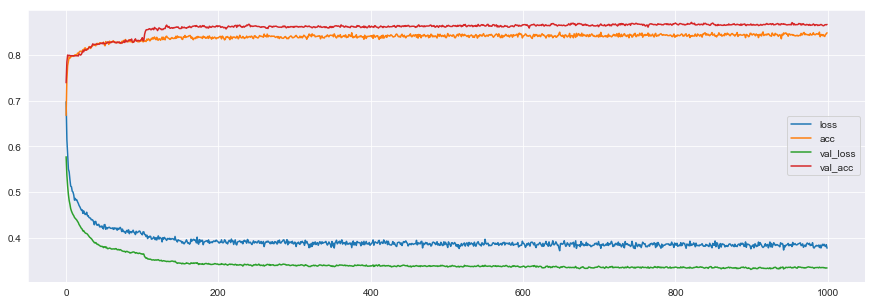

In [95]:
losses_3.plot(figsize=(15, 5))

### Building the DFF_NN (Using neither Dropout nor EarlyStopping)

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=25, mode='min')

# Creating the model
model_4 = Sequential()

# Input/hidder layer
model_4.add(Dense(units=X_train.shape[1], activation='relu'))
#model_3.add(Dropout(rate=0.2))

# Hidder layer
model_4.add(Dense(units=X_train.shape[1] // 2, activation='relu'))
#model_3.add(Dropout(rate=0.5))

# Output layer
model_4.add(Dense(units=1, activation='sigmoid'))

# Compiling
model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the model
model_4.fit(X_train, y_train, batch_size=128, epochs=1000, validation_data=(X_test, y_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/1000
8000/8000 [==============================] - 3s 358us/sample - loss: 0.6461 - acc: 0.6481 - val_loss: 0.5884 - val_acc: 0.7445
Epoch 2/1000
8000/8000 [==============================] - 0s 59us/sample - loss: 0.5557 - acc: 0.7684 - val_loss: 0.5120 - val_acc: 0.7870
Epoch 3/1000
8000/8000 [==============================] - 0s 58us/sample - loss: 0.4897 - acc: 0.7924 - val_loss: 0.4649 - val_acc: 0.7975
Epoch 4/1000
8000/8000 [==============================] - 0s 57us/sample - loss: 0.4560 - acc: 0.8011 - val_loss: 0.4441 - val_acc: 0.8035
Epoch 5/1000
8000/8000 [==============================] - 1s 65us/sample - loss: 0.4406 - acc: 0.8087 - val_loss: 0.4322 - val_acc: 0.8150
Epoch 6/1000
8000/8000 [==============================] - 0s 55us/sample - loss: 0.4309 - acc: 0.8124 - val_loss: 0.4234 - val_acc: 0.8190
Epoch 7/1000
8000/8000 [==============================] - 0s 58us/sample - loss: 0.4236 - acc: 0.8180 - val_loss: 0.4

8000/8000 [==============================] - 0s 54us/sample - loss: 0.3340 - acc: 0.8627 - val_loss: 0.3339 - val_acc: 0.8615
Epoch 60/1000
8000/8000 [==============================] - 0s 59us/sample - loss: 0.3334 - acc: 0.8641 - val_loss: 0.3328 - val_acc: 0.8620
Epoch 61/1000
8000/8000 [==============================] - 1s 78us/sample - loss: 0.3333 - acc: 0.8625 - val_loss: 0.3338 - val_acc: 0.8610
Epoch 62/1000
8000/8000 [==============================] - 1s 83us/sample - loss: 0.3333 - acc: 0.8640 - val_loss: 0.3333 - val_acc: 0.8615
Epoch 63/1000
8000/8000 [==============================] - 0s 61us/sample - loss: 0.3331 - acc: 0.8645 - val_loss: 0.3333 - val_acc: 0.8630
Epoch 64/1000
8000/8000 [==============================] - 0s 61us/sample - loss: 0.3332 - acc: 0.8634 - val_loss: 0.3349 - val_acc: 0.8620
Epoch 65/1000
8000/8000 [==============================] - 0s 61us/sample - loss: 0.3331 - acc: 0.8622 - val_loss: 0.3326 - val_acc: 0.8610
Epoch 66/1000
8000/8000 [=========

8000/8000 [==============================] - 0s 53us/sample - loss: 0.3300 - acc: 0.8635 - val_loss: 0.3346 - val_acc: 0.8620
Epoch 117/1000
8000/8000 [==============================] - 0s 54us/sample - loss: 0.3300 - acc: 0.8661 - val_loss: 0.3330 - val_acc: 0.8630
Epoch 118/1000
8000/8000 [==============================] - 0s 57us/sample - loss: 0.3300 - acc: 0.8640 - val_loss: 0.3351 - val_acc: 0.8610
Epoch 119/1000
8000/8000 [==============================] - 0s 53us/sample - loss: 0.3295 - acc: 0.8655 - val_loss: 0.3341 - val_acc: 0.8615
Epoch 120/1000
8000/8000 [==============================] - 0s 55us/sample - loss: 0.3296 - acc: 0.8639 - val_loss: 0.3365 - val_acc: 0.8600
Epoch 121/1000
8000/8000 [==============================] - 0s 57us/sample - loss: 0.3301 - acc: 0.8643 - val_loss: 0.3355 - val_acc: 0.8615
Epoch 122/1000
8000/8000 [==============================] - 1s 71us/sample - loss: 0.3295 - acc: 0.8644 - val_loss: 0.3359 - val_acc: 0.8600
Epoch 123/1000
8000/8000 [==

Epoch 174/1000
8000/8000 [==============================] - 0s 44us/sample - loss: 0.3279 - acc: 0.8656 - val_loss: 0.3380 - val_acc: 0.8585
Epoch 175/1000
8000/8000 [==============================] - 0s 43us/sample - loss: 0.3275 - acc: 0.8661 - val_loss: 0.3375 - val_acc: 0.8570
Epoch 176/1000
8000/8000 [==============================] - 0s 44us/sample - loss: 0.3277 - acc: 0.8654 - val_loss: 0.3372 - val_acc: 0.8590
Epoch 177/1000
8000/8000 [==============================] - 0s 35us/sample - loss: 0.3276 - acc: 0.8644 - val_loss: 0.3382 - val_acc: 0.8565
Epoch 178/1000
8000/8000 [==============================] - 0s 31us/sample - loss: 0.3276 - acc: 0.8654 - val_loss: 0.3374 - val_acc: 0.8595
Epoch 179/1000
8000/8000 [==============================] - 0s 33us/sample - loss: 0.3274 - acc: 0.8668 - val_loss: 0.3372 - val_acc: 0.8580
Epoch 180/1000
8000/8000 [==============================] - 0s 33us/sample - loss: 0.3274 - acc: 0.8660 - val_loss: 0.3372 - val_acc: 0.8575
Epoch 181/100

8000/8000 [==============================] - 0s 61us/sample - loss: 0.3264 - acc: 0.8668 - val_loss: 0.3374 - val_acc: 0.8565
Epoch 233/1000
8000/8000 [==============================] - 0s 60us/sample - loss: 0.3269 - acc: 0.8665 - val_loss: 0.3379 - val_acc: 0.8590
Epoch 234/1000
8000/8000 [==============================] - 0s 61us/sample - loss: 0.3268 - acc: 0.8652 - val_loss: 0.3371 - val_acc: 0.8570
Epoch 235/1000
8000/8000 [==============================] - 1s 86us/sample - loss: 0.3266 - acc: 0.8665 - val_loss: 0.3371 - val_acc: 0.8590
Epoch 236/1000
8000/8000 [==============================] - 1s 64us/sample - loss: 0.3265 - acc: 0.8670 - val_loss: 0.3392 - val_acc: 0.8585
Epoch 237/1000
8000/8000 [==============================] - 0s 61us/sample - loss: 0.3264 - acc: 0.8670 - val_loss: 0.3371 - val_acc: 0.8605
Epoch 238/1000
8000/8000 [==============================] - 0s 60us/sample - loss: 0.3269 - acc: 0.8660 - val_loss: 0.3378 - val_acc: 0.8595
Epoch 239/1000
8000/8000 [==

8000/8000 [==============================] - 0s 40us/sample - loss: 0.3260 - acc: 0.8677 - val_loss: 0.3375 - val_acc: 0.8600
Epoch 290/1000
8000/8000 [==============================] - 0s 43us/sample - loss: 0.3261 - acc: 0.8675 - val_loss: 0.3373 - val_acc: 0.8605
Epoch 291/1000
8000/8000 [==============================] - 0s 45us/sample - loss: 0.3262 - acc: 0.8669 - val_loss: 0.3383 - val_acc: 0.8605
Epoch 292/1000
8000/8000 [==============================] - 0s 38us/sample - loss: 0.3260 - acc: 0.8665 - val_loss: 0.3378 - val_acc: 0.8585
Epoch 293/1000
8000/8000 [==============================] - 0s 47us/sample - loss: 0.3260 - acc: 0.8662 - val_loss: 0.3371 - val_acc: 0.8610
Epoch 294/1000
8000/8000 [==============================] - 0s 47us/sample - loss: 0.3258 - acc: 0.8662 - val_loss: 0.3390 - val_acc: 0.8610
Epoch 295/1000
8000/8000 [==============================] - 0s 50us/sample - loss: 0.3260 - acc: 0.8676 - val_loss: 0.3363 - val_acc: 0.8590
Epoch 296/1000
8000/8000 [==

Epoch 347/1000
8000/8000 [==============================] - 0s 41us/sample - loss: 0.3256 - acc: 0.8660 - val_loss: 0.3370 - val_acc: 0.8575
Epoch 348/1000
8000/8000 [==============================] - 0s 42us/sample - loss: 0.3253 - acc: 0.8669 - val_loss: 0.3365 - val_acc: 0.8590
Epoch 349/1000
8000/8000 [==============================] - 0s 37us/sample - loss: 0.3255 - acc: 0.8666 - val_loss: 0.3388 - val_acc: 0.8600
Epoch 350/1000
8000/8000 [==============================] - 0s 43us/sample - loss: 0.3253 - acc: 0.8679 - val_loss: 0.3360 - val_acc: 0.8590
Epoch 351/1000
8000/8000 [==============================] - 0s 36us/sample - loss: 0.3252 - acc: 0.8670 - val_loss: 0.3356 - val_acc: 0.8585
Epoch 352/1000
8000/8000 [==============================] - 0s 35us/sample - loss: 0.3254 - acc: 0.8673 - val_loss: 0.3364 - val_acc: 0.8580
Epoch 353/1000
8000/8000 [==============================] - 0s 34us/sample - loss: 0.3249 - acc: 0.8669 - val_loss: 0.3359 - val_acc: 0.8590
Epoch 354/100

Epoch 405/1000
8000/8000 [==============================] - 0s 40us/sample - loss: 0.3246 - acc: 0.8683 - val_loss: 0.3358 - val_acc: 0.8585
Epoch 406/1000
8000/8000 [==============================] - 0s 40us/sample - loss: 0.3249 - acc: 0.8681 - val_loss: 0.3354 - val_acc: 0.8595
Epoch 407/1000
8000/8000 [==============================] - 0s 42us/sample - loss: 0.3247 - acc: 0.8679 - val_loss: 0.3356 - val_acc: 0.8595
Epoch 408/1000
8000/8000 [==============================] - 0s 43us/sample - loss: 0.3252 - acc: 0.8676 - val_loss: 0.3391 - val_acc: 0.8600
Epoch 409/1000
8000/8000 [==============================] - 0s 39us/sample - loss: 0.3247 - acc: 0.8676 - val_loss: 0.3361 - val_acc: 0.8595
Epoch 410/1000
8000/8000 [==============================] - 0s 39us/sample - loss: 0.3244 - acc: 0.8691 - val_loss: 0.3350 - val_acc: 0.8585
Epoch 411/1000
8000/8000 [==============================] - 0s 37us/sample - loss: 0.3246 - acc: 0.8677 - val_loss: 0.3358 - val_acc: 0.8600
Epoch 412/100

8000/8000 [==============================] - 0s 50us/sample - loss: 0.3238 - acc: 0.8675 - val_loss: 0.3365 - val_acc: 0.8580
Epoch 464/1000
8000/8000 [==============================] - 0s 38us/sample - loss: 0.3239 - acc: 0.8675 - val_loss: 0.3380 - val_acc: 0.8575
Epoch 465/1000
8000/8000 [==============================] - 0s 36us/sample - loss: 0.3239 - acc: 0.8675 - val_loss: 0.3355 - val_acc: 0.8590
Epoch 466/1000
8000/8000 [==============================] - 0s 43us/sample - loss: 0.3237 - acc: 0.8681 - val_loss: 0.3373 - val_acc: 0.8595
Epoch 467/1000
8000/8000 [==============================] - 0s 34us/sample - loss: 0.3237 - acc: 0.8671 - val_loss: 0.3351 - val_acc: 0.8580
Epoch 468/1000
8000/8000 [==============================] - 0s 34us/sample - loss: 0.3237 - acc: 0.8669 - val_loss: 0.3345 - val_acc: 0.8575
Epoch 469/1000
8000/8000 [==============================] - 0s 35us/sample - loss: 0.3237 - acc: 0.8685 - val_loss: 0.3356 - val_acc: 0.8585
Epoch 470/1000
8000/8000 [==

8000/8000 [==============================] - 0s 38us/sample - loss: 0.3230 - acc: 0.8674 - val_loss: 0.3363 - val_acc: 0.8570
Epoch 522/1000
8000/8000 [==============================] - 0s 33us/sample - loss: 0.3231 - acc: 0.8685 - val_loss: 0.3353 - val_acc: 0.8585
Epoch 523/1000
8000/8000 [==============================] - 0s 34us/sample - loss: 0.3230 - acc: 0.8684 - val_loss: 0.3365 - val_acc: 0.8610
Epoch 524/1000
8000/8000 [==============================] - 0s 33us/sample - loss: 0.3230 - acc: 0.8684 - val_loss: 0.3367 - val_acc: 0.8585
Epoch 525/1000
8000/8000 [==============================] - 0s 33us/sample - loss: 0.3231 - acc: 0.8686 - val_loss: 0.3360 - val_acc: 0.8590
Epoch 526/1000
8000/8000 [==============================] - 0s 35us/sample - loss: 0.3231 - acc: 0.8679 - val_loss: 0.3359 - val_acc: 0.8575
Epoch 527/1000
8000/8000 [==============================] - 0s 34us/sample - loss: 0.3232 - acc: 0.8676 - val_loss: 0.3360 - val_acc: 0.8580
Epoch 528/1000
8000/8000 [==

8000/8000 [==============================] - 0s 37us/sample - loss: 0.3227 - acc: 0.8679 - val_loss: 0.3369 - val_acc: 0.8590
Epoch 580/1000
8000/8000 [==============================] - 0s 45us/sample - loss: 0.3229 - acc: 0.8669 - val_loss: 0.3371 - val_acc: 0.8600
Epoch 581/1000
8000/8000 [==============================] - ETA: 0s - loss: 0.3243 - acc: 0.867 - 0s 44us/sample - loss: 0.3228 - acc: 0.8674 - val_loss: 0.3357 - val_acc: 0.8565
Epoch 582/1000
8000/8000 [==============================] - 0s 41us/sample - loss: 0.3223 - acc: 0.8670 - val_loss: 0.3341 - val_acc: 0.8575
Epoch 583/1000
8000/8000 [==============================] - 0s 48us/sample - loss: 0.3230 - acc: 0.8680 - val_loss: 0.3368 - val_acc: 0.8550
Epoch 584/1000
8000/8000 [==============================] - 0s 36us/sample - loss: 0.3227 - acc: 0.8670 - val_loss: 0.3386 - val_acc: 0.8605
Epoch 585/1000
8000/8000 [==============================] - 0s 38us/sample - loss: 0.3229 - acc: 0.8670 - val_loss: 0.3362 - val_ac

8000/8000 [==============================] - 0s 42us/sample - loss: 0.3225 - acc: 0.8675 - val_loss: 0.3374 - val_acc: 0.8555
Epoch 637/1000
8000/8000 [==============================] - 0s 39us/sample - loss: 0.3223 - acc: 0.8666 - val_loss: 0.3367 - val_acc: 0.8560
Epoch 638/1000
8000/8000 [==============================] - 0s 37us/sample - loss: 0.3223 - acc: 0.8673 - val_loss: 0.3367 - val_acc: 0.8565
Epoch 639/1000
8000/8000 [==============================] - 0s 36us/sample - loss: 0.3225 - acc: 0.8681 - val_loss: 0.3370 - val_acc: 0.8565
Epoch 640/1000
8000/8000 [==============================] - 0s 35us/sample - loss: 0.3224 - acc: 0.8677 - val_loss: 0.3366 - val_acc: 0.8560
Epoch 641/1000
8000/8000 [==============================] - 0s 36us/sample - loss: 0.3223 - acc: 0.8677 - val_loss: 0.3349 - val_acc: 0.8555
Epoch 642/1000
8000/8000 [==============================] - 0s 36us/sample - loss: 0.3225 - acc: 0.8677 - val_loss: 0.3361 - val_acc: 0.8555
Epoch 643/1000
8000/8000 [==

8000/8000 [==============================] - 0s 43us/sample - loss: 0.3220 - acc: 0.8681 - val_loss: 0.3369 - val_acc: 0.8570
Epoch 695/1000
8000/8000 [==============================] - 0s 41us/sample - loss: 0.3219 - acc: 0.8685 - val_loss: 0.3360 - val_acc: 0.8560
Epoch 696/1000
8000/8000 [==============================] - 0s 49us/sample - loss: 0.3220 - acc: 0.8684 - val_loss: 0.3352 - val_acc: 0.8550
Epoch 697/1000
8000/8000 [==============================] - 0s 47us/sample - loss: 0.3221 - acc: 0.8675 - val_loss: 0.3357 - val_acc: 0.8545
Epoch 698/1000
8000/8000 [==============================] - 0s 44us/sample - loss: 0.3222 - acc: 0.8684 - val_loss: 0.3361 - val_acc: 0.8565
Epoch 699/1000
8000/8000 [==============================] - 0s 54us/sample - loss: 0.3222 - acc: 0.8686 - val_loss: 0.3351 - val_acc: 0.8550
Epoch 700/1000
8000/8000 [==============================] - 0s 45us/sample - loss: 0.3221 - acc: 0.8686 - val_loss: 0.3369 - val_acc: 0.8590
Epoch 701/1000
8000/8000 [==

8000/8000 [==============================] - 0s 34us/sample - loss: 0.3225 - acc: 0.8686 - val_loss: 0.3365 - val_acc: 0.8580
Epoch 753/1000
8000/8000 [==============================] - 0s 34us/sample - loss: 0.3217 - acc: 0.8696 - val_loss: 0.3347 - val_acc: 0.8550
Epoch 754/1000
8000/8000 [==============================] - 0s 33us/sample - loss: 0.3221 - acc: 0.8686 - val_loss: 0.3347 - val_acc: 0.8545
Epoch 755/1000
8000/8000 [==============================] - 0s 44us/sample - loss: 0.3222 - acc: 0.8680 - val_loss: 0.3358 - val_acc: 0.8555
Epoch 756/1000
8000/8000 [==============================] - 0s 38us/sample - loss: 0.3220 - acc: 0.8691 - val_loss: 0.3380 - val_acc: 0.8580
Epoch 757/1000
8000/8000 [==============================] - 0s 33us/sample - loss: 0.3225 - acc: 0.8689 - val_loss: 0.3379 - val_acc: 0.8590
Epoch 758/1000
8000/8000 [==============================] - 0s 34us/sample - loss: 0.3219 - acc: 0.8685 - val_loss: 0.3377 - val_acc: 0.8585
Epoch 759/1000
8000/8000 [==

8000/8000 [==============================] - 0s 36us/sample - loss: 0.3221 - acc: 0.8674 - val_loss: 0.3361 - val_acc: 0.8550
Epoch 811/1000
8000/8000 [==============================] - 0s 35us/sample - loss: 0.3218 - acc: 0.8674 - val_loss: 0.3359 - val_acc: 0.8545
Epoch 812/1000
8000/8000 [==============================] - 0s 38us/sample - loss: 0.3218 - acc: 0.8679 - val_loss: 0.3357 - val_acc: 0.8555
Epoch 813/1000
8000/8000 [==============================] - 0s 33us/sample - loss: 0.3217 - acc: 0.8686 - val_loss: 0.3381 - val_acc: 0.8585
Epoch 814/1000
8000/8000 [==============================] - 0s 34us/sample - loss: 0.3217 - acc: 0.8690 - val_loss: 0.3363 - val_acc: 0.8550
Epoch 815/1000
8000/8000 [==============================] - 0s 33us/sample - loss: 0.3218 - acc: 0.8683 - val_loss: 0.3357 - val_acc: 0.8555
Epoch 816/1000
8000/8000 [==============================] - 0s 34us/sample - loss: 0.3219 - acc: 0.8694 - val_loss: 0.3380 - val_acc: 0.8555
Epoch 817/1000
8000/8000 [==

8000/8000 [==============================] - 0s 59us/sample - loss: 0.3216 - acc: 0.8685 - val_loss: 0.3373 - val_acc: 0.8565
Epoch 869/1000
8000/8000 [==============================] - 0s 57us/sample - loss: 0.3217 - acc: 0.8694 - val_loss: 0.3360 - val_acc: 0.8545
Epoch 870/1000
8000/8000 [==============================] - 0s 58us/sample - loss: 0.3221 - acc: 0.8679 - val_loss: 0.3376 - val_acc: 0.8545
Epoch 871/1000
8000/8000 [==============================] - 0s 40us/sample - loss: 0.3218 - acc: 0.8684 - val_loss: 0.3382 - val_acc: 0.8605
Epoch 872/1000
8000/8000 [==============================] - 0s 61us/sample - loss: 0.3219 - acc: 0.8680 - val_loss: 0.3380 - val_acc: 0.8545
Epoch 873/1000
8000/8000 [==============================] - 0s 47us/sample - loss: 0.3216 - acc: 0.8690 - val_loss: 0.3370 - val_acc: 0.8570
Epoch 874/1000
8000/8000 [==============================] - 0s 39us/sample - loss: 0.3218 - acc: 0.8685 - val_loss: 0.3352 - val_acc: 0.8540
Epoch 875/1000
8000/8000 [==

8000/8000 [==============================] - 0s 37us/sample - loss: 0.3216 - acc: 0.8675 - val_loss: 0.3364 - val_acc: 0.8535
Epoch 926/1000
8000/8000 [==============================] - 0s 35us/sample - loss: 0.3216 - acc: 0.8676 - val_loss: 0.3352 - val_acc: 0.8540
Epoch 927/1000
8000/8000 [==============================] - 0s 38us/sample - loss: 0.3218 - acc: 0.8685 - val_loss: 0.3357 - val_acc: 0.8555
Epoch 928/1000
8000/8000 [==============================] - 0s 34us/sample - loss: 0.3215 - acc: 0.8686 - val_loss: 0.3383 - val_acc: 0.8580
Epoch 929/1000
8000/8000 [==============================] - 0s 35us/sample - loss: 0.3214 - acc: 0.8662 - val_loss: 0.3356 - val_acc: 0.8550
Epoch 930/1000
8000/8000 [==============================] - 0s 34us/sample - loss: 0.3216 - acc: 0.8694 - val_loss: 0.3351 - val_acc: 0.8540
Epoch 931/1000
8000/8000 [==============================] - 0s 34us/sample - loss: 0.3219 - acc: 0.8685 - val_loss: 0.3354 - val_acc: 0.8535
Epoch 932/1000
8000/8000 [==

Epoch 983/1000
8000/8000 [==============================] - 0s 35us/sample - loss: 0.3213 - acc: 0.8698 - val_loss: 0.3379 - val_acc: 0.8550
Epoch 984/1000
8000/8000 [==============================] - 0s 34us/sample - loss: 0.3215 - acc: 0.8683 - val_loss: 0.3363 - val_acc: 0.8530
Epoch 985/1000
8000/8000 [==============================] - 0s 34us/sample - loss: 0.3214 - acc: 0.8681 - val_loss: 0.3361 - val_acc: 0.8565
Epoch 986/1000
8000/8000 [==============================] - 0s 34us/sample - loss: 0.3214 - acc: 0.8681 - val_loss: 0.3391 - val_acc: 0.8545
Epoch 987/1000
8000/8000 [==============================] - 0s 34us/sample - loss: 0.3211 - acc: 0.8687 - val_loss: 0.3351 - val_acc: 0.8560
Epoch 988/1000
8000/8000 [==============================] - 0s 34us/sample - loss: 0.3212 - acc: 0.8683 - val_loss: 0.3364 - val_acc: 0.8545
Epoch 989/1000
8000/8000 [==============================] - 0s 37us/sample - loss: 0.3215 - acc: 0.8680 - val_loss: 0.3361 - val_acc: 0.8570
Epoch 990/100

### Visualising (Using neither Dropout nor EarlyStopping)

In [92]:
losses_4 = pd.DataFrame(model_4.history.history)
losses_4[-50:]

,loss,acc,val_loss,val_acc
950,0.321675,0.867625,0.336479,0.8570
951,0.321240,0.867750,0.337142,0.8570
952,0.321334,0.867875,0.336180,0.8550
953,0.321238,0.867875,0.335451,0.8540
954,0.321549,0.869250,0.336956,0.8550
955,0.321271,0.868375,0.337818,0.8565
956,0.321502,0.868000,0.336860,0.8555
957,0.321248,0.868375,0.335995,0.8545
958,0.321567,0.869250,0.337102,0.8560
959,0.321402,0.868250,0.335674,0.8545


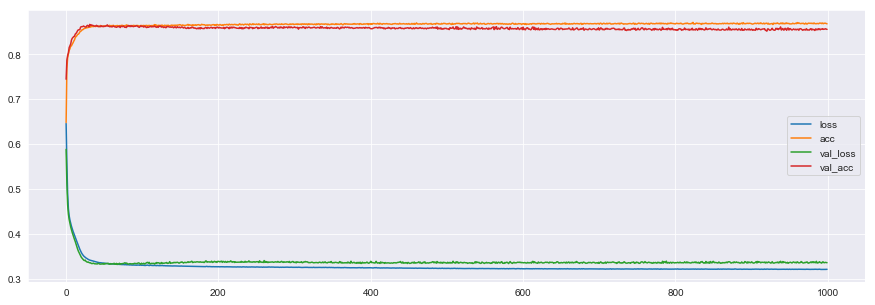

In [93]:
losses_4.plot(figsize=(15, 5))

In [96]:
# Summary:

# Dropout and EarlyStopping
# Epochs = 167
# Loss = 0.40
# Val_loss = 0.35

# EarlyStopping
# Epochs = 218
# Loss = 0.32
# Val_loss = 0.33

# Dropout
# Epochs = 1000
# Loss = 0.38
# Val_loss = 0.38

# Nor Dropout nor EarlyStopping
# Epochs = 1000
# Loss = 0.32
# Val_loss = 0.34

### Predicting using the test data

In [108]:
y_pred = model.predict_classes(X_test)

### Evaluating the model

In [117]:
from sklearn import metrics
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('F1-Score:', metrics.f1_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred)) # Better for multiclass problem

Confusion matrix:
 [[1577   18]
 [ 265  140]]
Accuracy: 0.8585
Precision: 0.8860759493670886
Recall: 0.345679012345679
F1-Score: 0.4973357015985789
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1595
           1       0.89      0.35      0.50       405

    accuracy                           0.86      2000
   macro avg       0.87      0.67      0.71      2000
weighted avg       0.86      0.86      0.83      2000



### Comparing with Random Forest

In [119]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [120]:
y_pred_rf = classifier.predict(X_test)

In [121]:
from sklearn import metrics
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_rf).ravel()
print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred_rf))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_rf))
print('Precision:', metrics.precision_score(y_test, y_pred_rf))
print('Recall:', metrics.recall_score(y_test, y_pred_rf))
print('F1-Score:', metrics.f1_score(y_test, y_pred_rf))
print(metrics.classification_report(y_test, y_pred_rf)) # Better for multiclass problem

Confusion matrix:
 [[1530   65]
 [ 197  208]]
Accuracy: 0.869
Precision: 0.7619047619047619
Recall: 0.5135802469135803
F1-Score: 0.6135693215339233
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1595
           1       0.76      0.51      0.61       405

    accuracy                           0.87      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000

